This first part of the project is going to representthe exploration of the datasets

Load Audio Files and Metadata

In [ ]:
import os

# Define dataset paths relative to the current working directory
ravdess_path = "./RAVDESS"
crema_path = "./CREMA/AudioWAV"

# List a few audio files
ravdess_files = sorted(os.listdir(ravdess_path))[:10]
crema_files = sorted(os.listdir(crema_path))[:10]

print("RAVDESS Files:", ravdess_files)
print("CREMA-D Files:", crema_files)


RAVDESS Files: ['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10']
CREMA-D Files: ['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


First we're going to explore the CremaD dataset

Description: The CREMA-D consists of 7,442 clips from 91 actors, aged 20 to 74, from diverse ethnic backgrounds. Actors perform a set of emotion-specific sentences.

First we are going to load an audio sample and inspect its properties:

In [9]:
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt

audio_path = './CREMA/AudioWAV/1001_DFA_ANG_XX.wav'  # Sample file
y, sr = librosa.load(audio_path, sr=16000)  # Load audio at 16 kHz

print(f"Audio Duration: {librosa.get_duration(y=y, sr=sr)} seconds")
print(f"Sampling Rate: {sr} Hz")


Audio Duration: 2.2755625 seconds
Sampling Rate: 16000 Hz


now we are going to Visualize the Audio Signal

1) Wavefrom

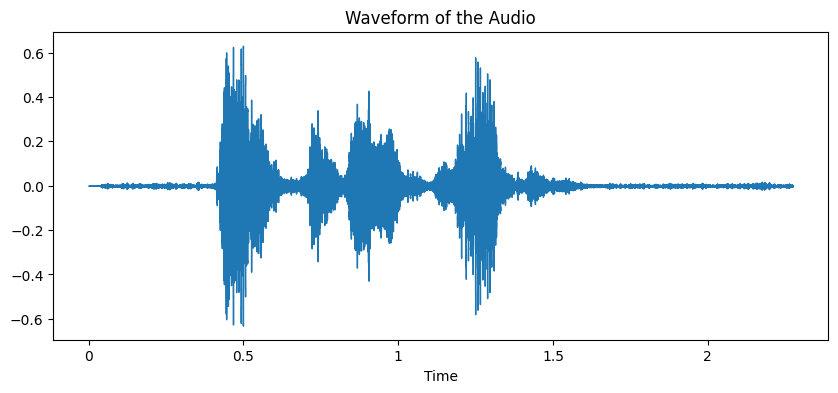

In [11]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of the Audio')
plt.show()


* Silence/Low Amplitude Segments: At the beginning (0 to ~0.2s) and end (~1.8s to 2.2s), the amplitude is close to zero, indicating silence or very low audio intensity.
* Active Segments: The amplitude increases significantly between 0.2s and 1.7s, showing the main part of the audio signal where sound is present.
* Peaks and Valleys: Multiple peaks and valleys are visible, indicating varying intensity levels, typical in speech signals due to changes in phonemes and vocal energy.
* Symmetry: The waveform is symmetric around the zero line, a characteristic of audio signals as the air pressure waves oscillate equally in both positive and negative directions.

2) Spectogram

C:\Users\bahri\AppData\Local\Temp\ipykernel_15792\3205883700.py:2: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectrogram = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


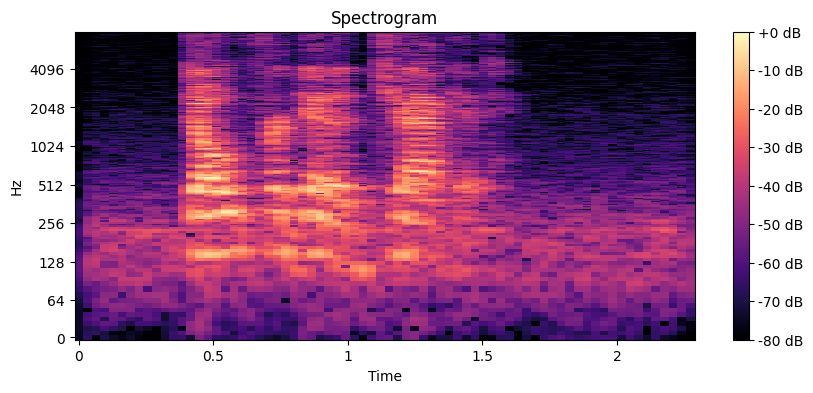

In [13]:
import numpy as np
spectrogram = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


* The spectrogram displays how the frequency content of an audio signal changes over time.
* The x-axis represents time (from 0 to approximately 2.2 seconds), while the y-axis represents frequency (from 0 Hz to about 4096 Hz).
* The color intensity indicates the amplitude in decibels (dB), with brighter colors representing higher energy and darker colors representing lower energy.

Secondly, we are going to use the metadata of the name of each file which has an exploitable format example "1054_ITS_ANG_XX.wav" each part represents something:

Parse Metadata from Filenames

In [14]:
import pandas as pd

def parse_cremad_filename(filename):
    parts = filename.split('_')
    return {
        'actor_id': parts[0],
        'sentence': parts[1],
        'emotion': parts[2],
        'intensity': parts[3].split('.')[0]
    }

audio_files = [f for f in os.listdir('./CREMA/AudioWAV') if f.endswith('.wav')]
data = [parse_cremad_filename(f) for f in audio_files]

df = pd.DataFrame(data)
print(df.head())


  actor_id sentence emotion intensity
0     1001      DFA     ANG        XX
1     1001      DFA     DIS        XX
2     1001      DFA     FEA        XX
3     1001      DFA     HAP        XX
4     1001      DFA     NEU        XX


Third, we are going to Explore the Dataset Distribution

Check how many samples per emotion:

In [16]:
import os
import pandas as pd

# Count the number of samples per emotion
emotion_counts = df['emotion'].value_counts()

# Display counts
print("Number of samples per emotion:")
print(emotion_counts)


Number of samples per emotion:
emotion
ANG    748
DIS    748
FEA    747
HAP    747
SAD    747
NEU    638
Name: count, dtype: int64


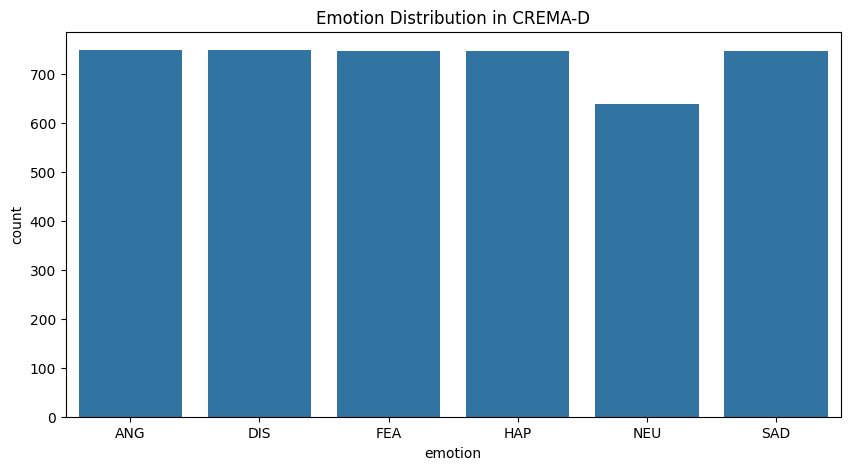

In [15]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x='emotion', data=df)
plt.title('Emotion Distribution in CREMA-D')
plt.show()


* Check distribution of intensity levels:

In [18]:

intensity_counts = df['intensity'].value_counts()

# Display counts
print("Number of samples per intensity:")
print(intensity_counts)


Number of samples per intensity:
intensity
XX    3564
HI     270
LO     270
MD     270
X        1
Name: count, dtype: int64


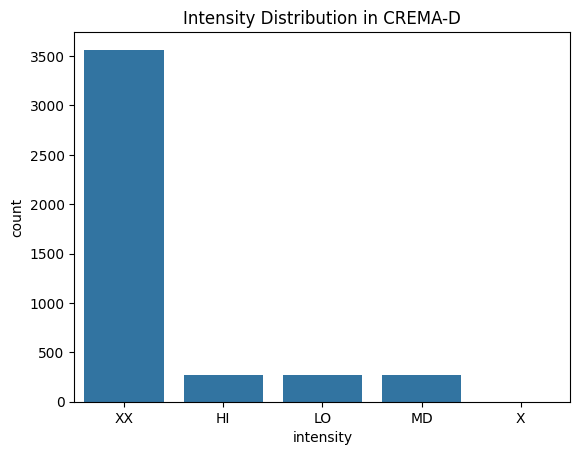

In [17]:
sns.countplot(x='intensity', data=df)
plt.title('Intensity Distribution in CREMA-D')
plt.show()
